## Importing Useful Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [2]:
train_data=pd.read_csv('C:\\Users\\91637\\Desktop\\Google_Stock_price\\Google_Stock_Price_Train.csv')

In [3]:
train_data.shape


(1258, 6)

In [4]:
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
test_data=pd.read_csv("C:\\Users\\91637\\Desktop\\Google_Stock_price\\Google_Stock_Price_Test.csv")

In [6]:
test_data.shape

(20, 6)

### Droping the columns that are not useful

In [7]:
train_data=train_data.iloc[:,1:2]

In [8]:
train_data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


## Feature Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler(feature_range=(0,1))
train_data=MMS.fit_transform(train_data)

In [10]:
train_data[0:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

In [11]:
train_data.size

1258

In [12]:
X_train=train_data[0:1257]
Y_train=train_data[1:1258]

In [13]:
X_train.shape

(1257, 1)

In [14]:
Y_train.shape

(1257, 1)

In [15]:
X_train=np.reshape(X_train,(1257,1,1))

In [16]:
X_train

array([[[0.08581368]],

       [[0.09701243]],

       [[0.09433366]],

       ...,

       [[0.95163331]],

       [[0.95725128]],

       [[0.93796041]]])

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

## Initializing the Model

In [18]:
# initializing the model
model = Sequential()

model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

model.add(Dense(units = 1))



## Trainig the Model

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, Y_train, batch_size = 32, epochs = 400)

Epoch 1/400
40/40 [==============================] - 4s 5ms/step - loss: 0.1284
Epoch 2/400
40/40 [==============================] - 0s 5ms/step - loss: 0.0878
Epoch 3/400
40/40 [==============================] - 0s 5ms/step - loss: 0.0698
Epoch 4/400
40/40 [==============================] - 0s 5ms/step - loss: 0.0633
Epoch 5/400
40/40 [==============================] - 0s 5ms/step - loss: 0.0607
Epoch 6/400
40/40 [==============================] - 0s 5ms/step - loss: 0.0590
Epoch 7/400
40/40 [==============================] - 0s 5ms/step - loss: 0.0574
Epoch 8/400
40/40 [==============================] - 0s 5ms/step - loss: 0.0557
Epoch 9/400
40/40 [==============================] - 0s 5ms/step - loss: 0.0539
Epoch 10/400
40/40 [==============================] - 0s 5ms/step - loss: 0.0521
Epoch 11/400
40/40 [==============================] - 0s 5ms/step - loss: 0.0502
Epoch 12/400
40/40 [==============================] - 0s 6ms/step - loss: 0.0482
Epoch 13/400
40/40 [=================

In [20]:
real_price = test_data.iloc[:,1:2]
real_price.head()

,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [21]:
inputs = real_price
inputs = MMS.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))

## Predicting the Price

In [22]:

predicted_price = model.predict(inputs)
predicted_price = MMS.inverse_transform(predicted_price)

1/1 [==============================] - 1s 573ms/step


In [23]:
predicted_price

array([[778.2012 ],
       [787.0639 ],
       [784.95355],
       [793.42914],
       [803.6363 ],
       [804.9675 ],
       [802.3583 ],
       [804.31116],
       [804.6213 ],
       [804.2565 ],
       [803.09784],
       [802.46796],
       [804.1015 ],
       [804.4115 ],
       [818.0519 ],
       [824.62646],
       [831.93506],
       [829.1746 ],
       [811.14795],
       [794.90045]], dtype=float32)

## Visualizing the predicted and real prices

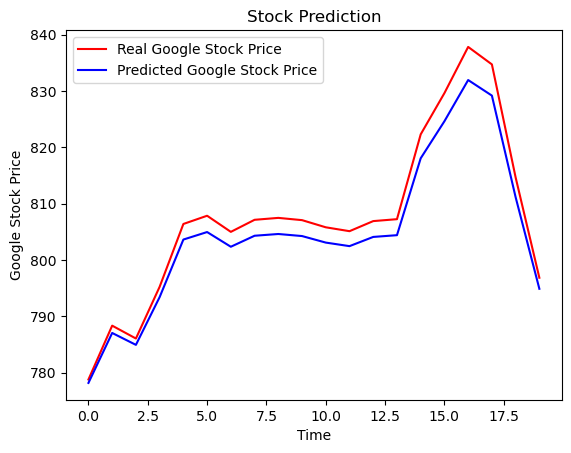

In [24]:
plt.plot(real_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [25]:
training_data = pd.read_csv('C:\\Users\\91637\\Desktop\\Google_Stock_price\\Google_Stock_Price_Train.csv')

training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [26]:
training_data = training_data.iloc[:, 1:2]

training_data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [27]:
predicted_price = model.predict(X_train)
predicted_price = MMS.inverse_transform(predicted_price)

40/40 [==============================] - 0s 4ms/step


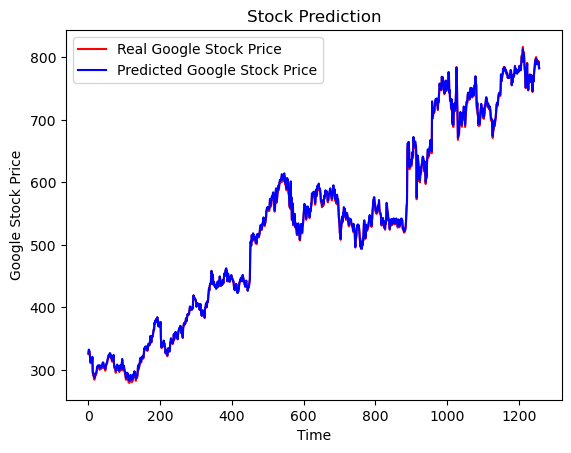

In [28]:
plt.plot(training_data, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## RNN Model

In [29]:
inputs = real_price
inputs = MMS.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))

predicted_price = model.predict(inputs)
predicted_price = MMS.inverse_transform(predicted_price)

1/1 [==============================] - 0s 65ms/step


In [30]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(real_price, predicted_price))
print(rmse)
     

3.2283674286919357
